### *Importation des bibliotheaques necesaires*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report , f1_score , accuracy_score ,recall_score , roc_curve , precision_score


In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<table>
  <thead>
    <tr>
      <th>Colonne</th>
      <th>Signification</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>RowNumber</td>
      <td>Numéro de ligne dans la base de données (identifiant interne, juste pour l'ordre).</td>
    </tr>
    <tr>
      <td>CustomerId</td>
      <td>Identifiant unique du client.</td>
    </tr>
    <tr>
      <td>Surname</td>
      <td>Nom de famille du client.</td>
    </tr>
    <tr>
      <td>CreditScore</td>
      <td>Score de crédit du client (capacité à rembourser un prêt).</td>
    </tr>
    <tr>
      <td>Geography</td>
      <td>Pays ou région où habite le client.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>Sexe du client (Male = Homme, Female = Femme).</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Âge du client.</td>
    </tr>
    <tr>
      <td>Tenure</td>
      <td>Ancienneté du client à la banque (en années).</td>
    </tr>
    <tr>
      <td>Balance</td>
      <td>Montant d'argent présent sur le compte bancaire du client.</td>
    </tr>
    <tr>
      <td>NumOfProducts</td>
      <td>Nombre de produits détenus par le client.</td>
    </tr>
    <tr>
      <td>HasCrCard</td>
      <td>Possède une carte de crédit ? (1 = Oui, 0 = Non).</td>
    </tr>
    <tr>
      <td>IsActiveMember</td>
      <td>Est un client actif ? (1 = Oui, 0 = Non).</td>
    </tr>
    <tr>
      <td>EstimatedSalary</td>
      <td>Salaire estimé du client.</td>
    </tr>
    <tr>
      <td>Exited</td>
      <td>A quitté la banque ? (1 = Oui, 0 = Non).</td>
    </tr>
  </tbody>
</table>


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **Partie de cleaning**

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- **visualisation avec histogrammes**

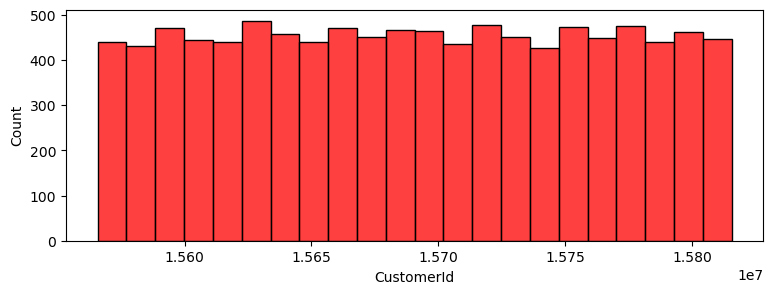

In [10]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["CustomerId"],color = "red")
plt.show()

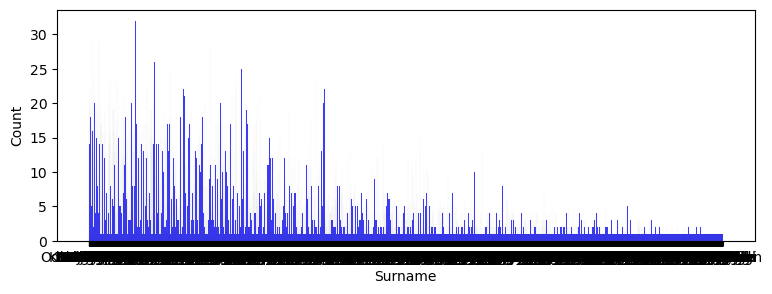

In [11]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["Surname"],color = "blue")
plt.show()

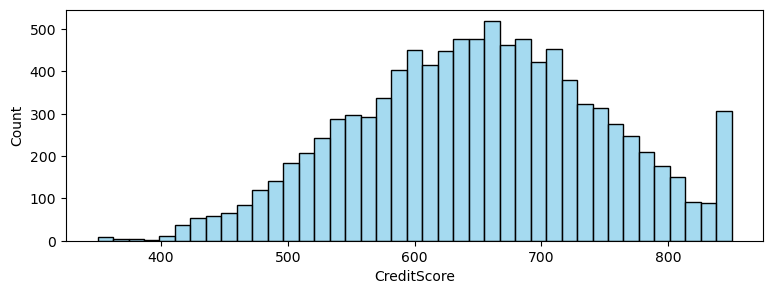

In [12]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["CreditScore"],color = "skyblue")
plt.show()

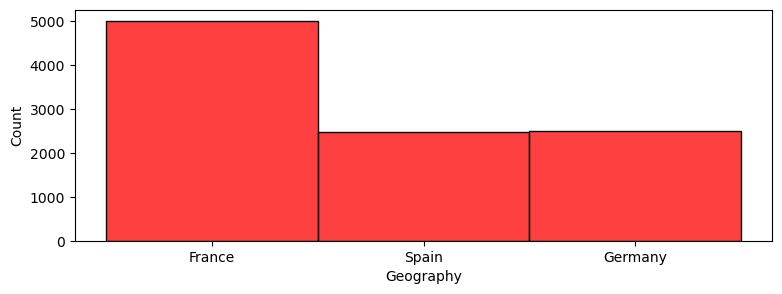

In [13]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["Geography"],color = "red")
plt.show()

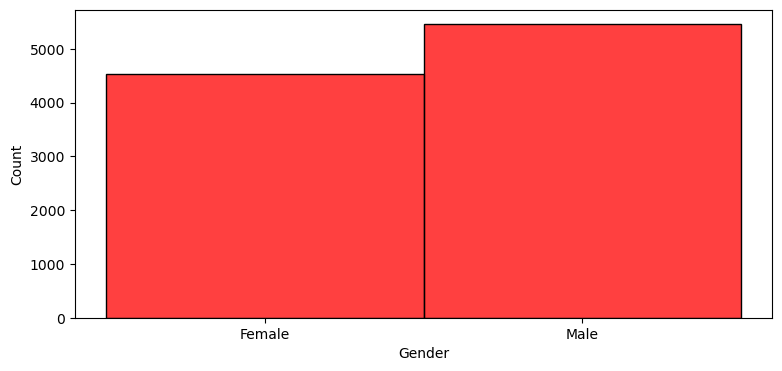

In [14]:
plt.figure(figsize = (9,4))
sns.histplot(data = data["Gender"],color = "red")
plt.show()

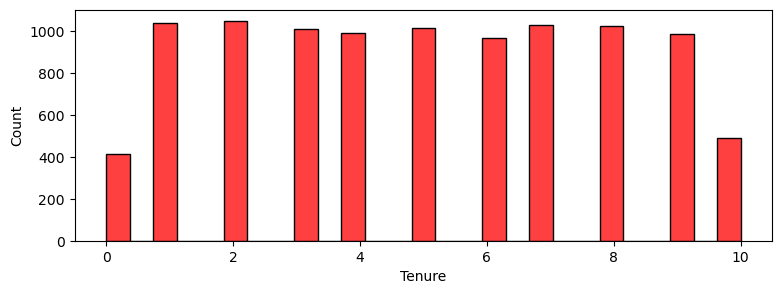

In [15]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["Tenure"],color = "red")
plt.show()

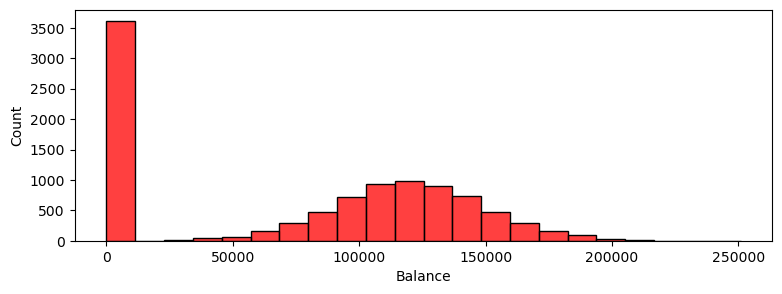

In [16]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["Balance"],color = "red")
plt.show()

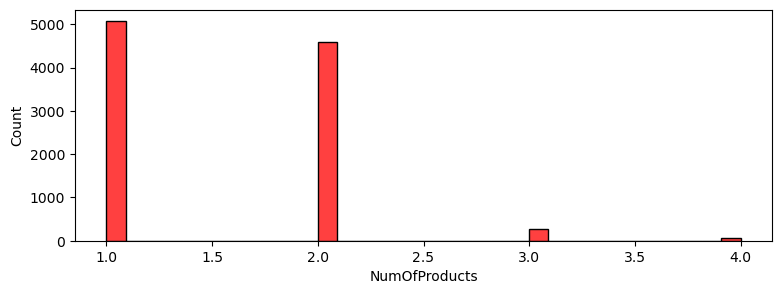

In [17]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["NumOfProducts"],color = "red")
plt.show()

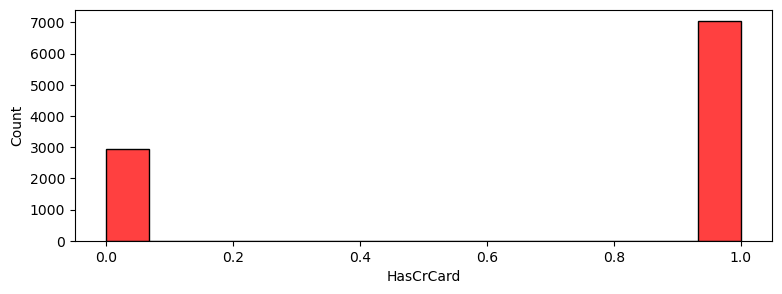

In [18]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["HasCrCard"],color = "red")
plt.show()

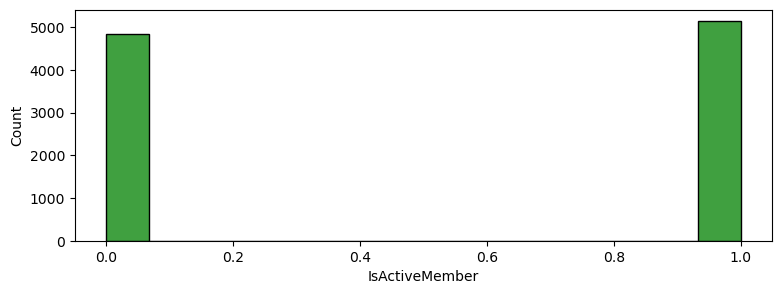

In [19]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["IsActiveMember"],color = "green")
plt.show()

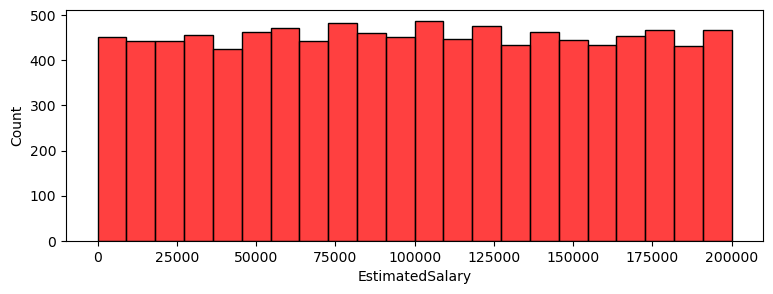

In [20]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["EstimatedSalary"],color = "red")
plt.show()

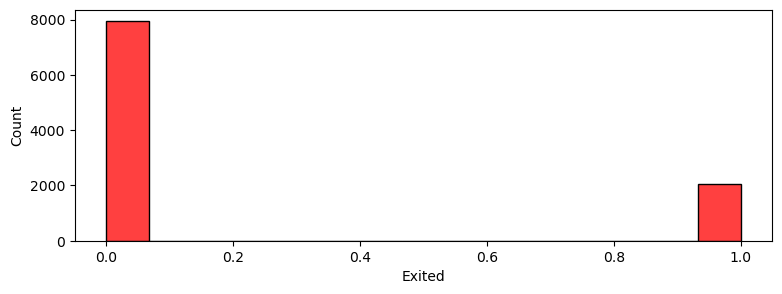

In [21]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["Exited"],color = "red")
plt.show()

- **Visualisation avec diagrammes**

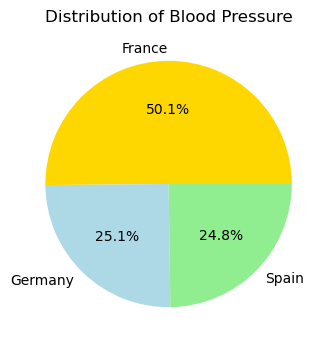

In [22]:
plt.figure(figsize=(9, 4))

bp_counts = data['Geography'].value_counts()
plt.pie(bp_counts, labels=bp_counts.index,
        colors=['gold', 'lightblue', 'lightgreen'],
        autopct='%1.1f%%')
plt.title('Distribution of Blood Pressure')

plt.show()

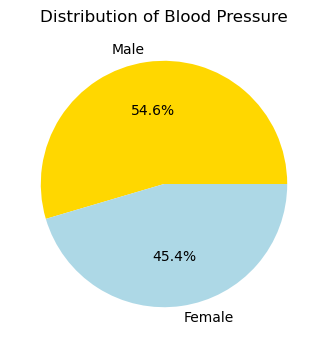

In [23]:
plt.figure(figsize=(9, 4))

bp_counts = data['Gender'].value_counts()
plt.pie(bp_counts, labels=bp_counts.index,
        colors=['gold', 'lightblue', 'lightgreen'],
        autopct='%1.1f%%')
plt.title('Distribution of Blood Pressure')

plt.show()

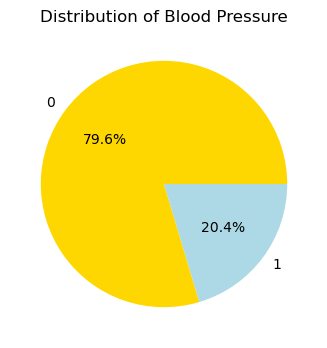

In [24]:
plt.figure(figsize=(9, 4))

bp_counts = data['Exited'].value_counts()
plt.pie(bp_counts, labels=bp_counts.index,
        colors=['gold', 'lightblue', 'lightgreen'],
        autopct='%1.1f%%')
plt.title('Distribution of Blood Pressure')

plt.show()

- **Visualisation avec scatterplot**

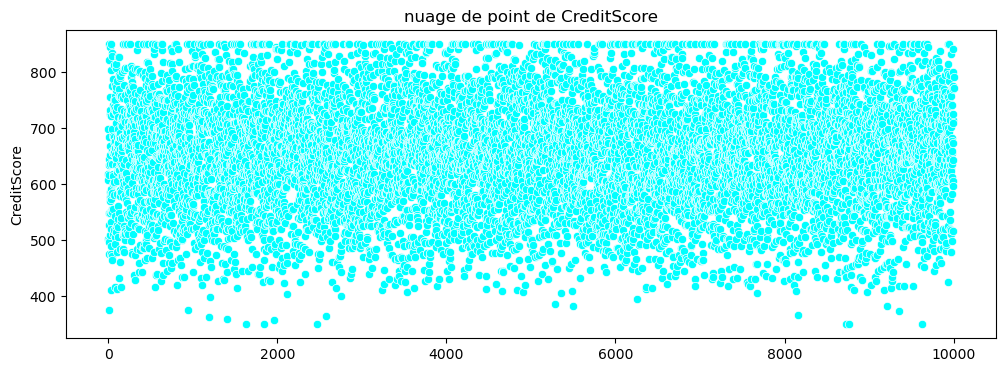

In [25]:
plt.figure(figsize = (12,4))

sns.scatterplot(data=data["CreditScore"],color ="Cyan")
plt.title("nuage de point de CreditScore")
plt.show()

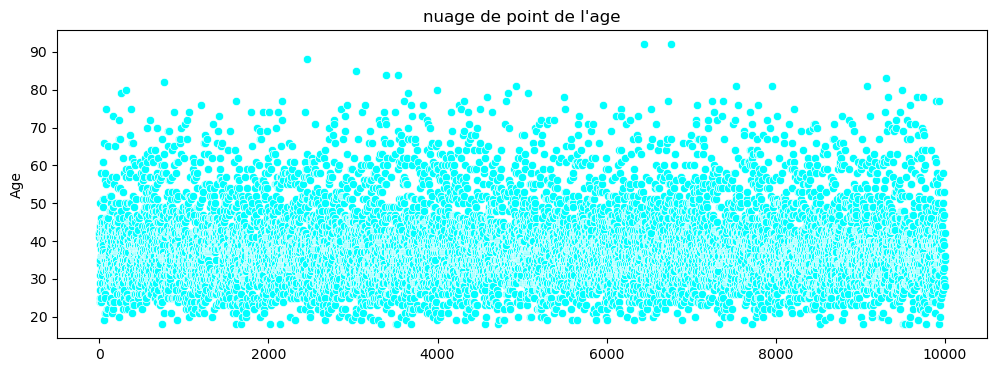

In [26]:
plt.figure(figsize = (12,4))

sns.scatterplot(data=data["Age"],color ="Cyan")
plt.title("nuage de point de l'age")
plt.show()

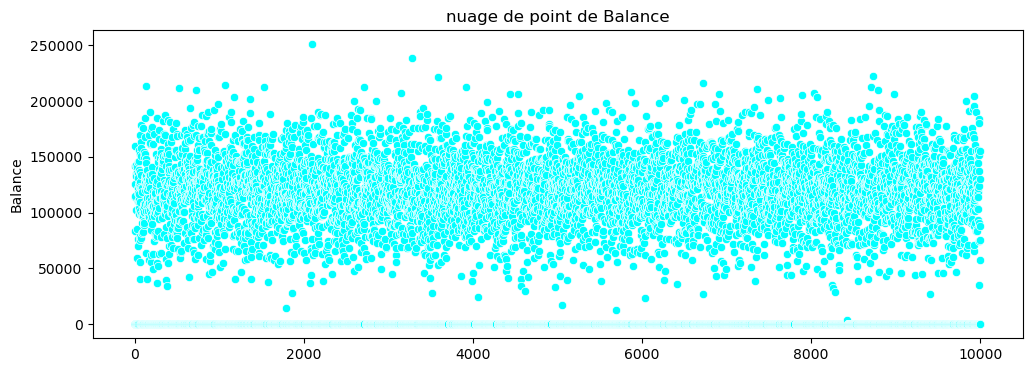

In [27]:
plt.figure(figsize = (12,4))

sns.scatterplot(data=data["Balance"],color ="Cyan")
plt.title("nuage de point de Balance")
plt.show()

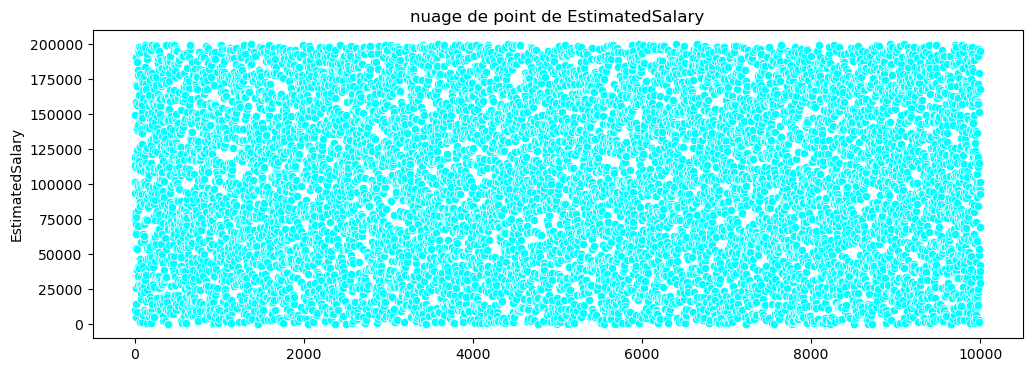

In [28]:
plt.figure(figsize = (12,4))

sns.scatterplot(data=data["EstimatedSalary"],color ="Cyan")
plt.title("nuage de point de EstimatedSalary")
plt.show()

- **Boxplot**

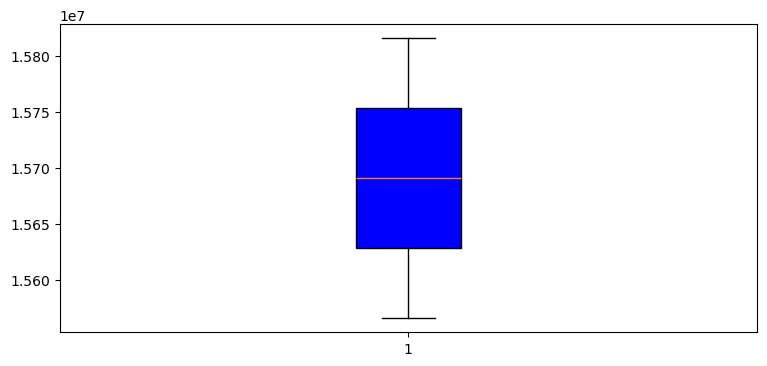

In [29]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["CustomerId"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

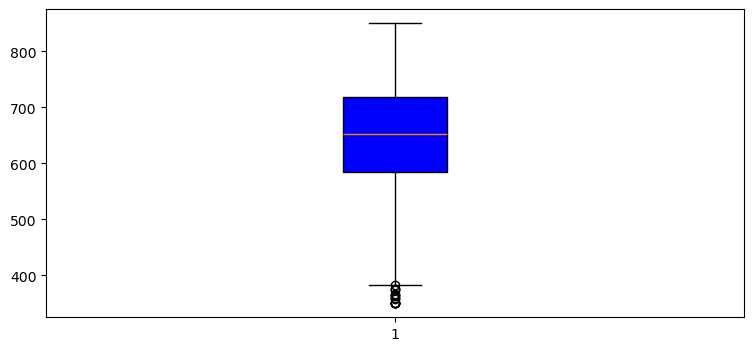

In [30]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["CreditScore"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

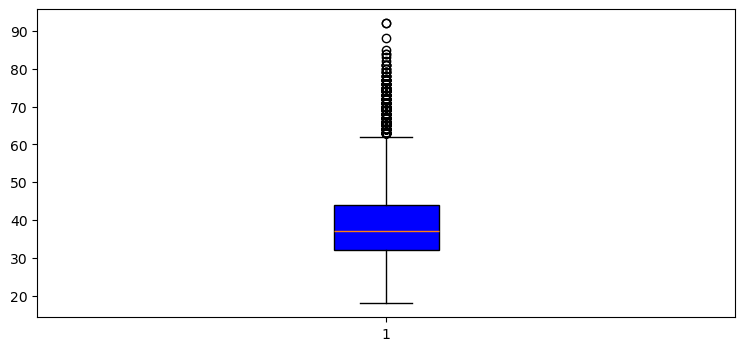

In [31]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["Age"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

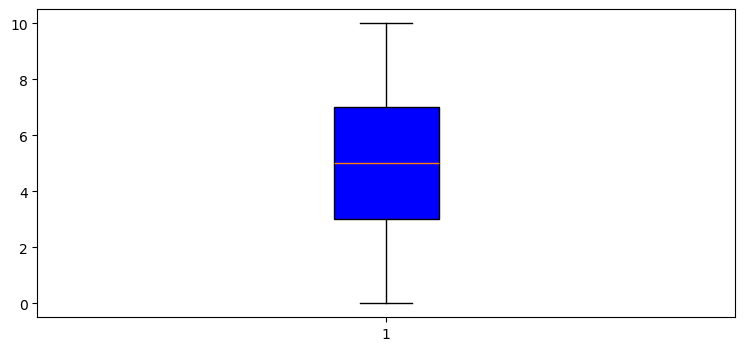

In [32]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["Tenure"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

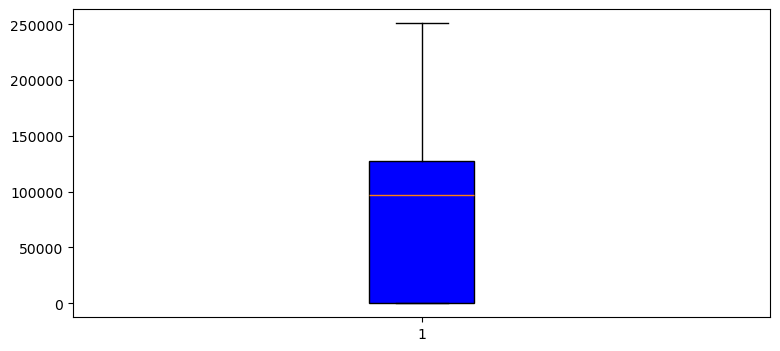

In [33]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["Balance"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

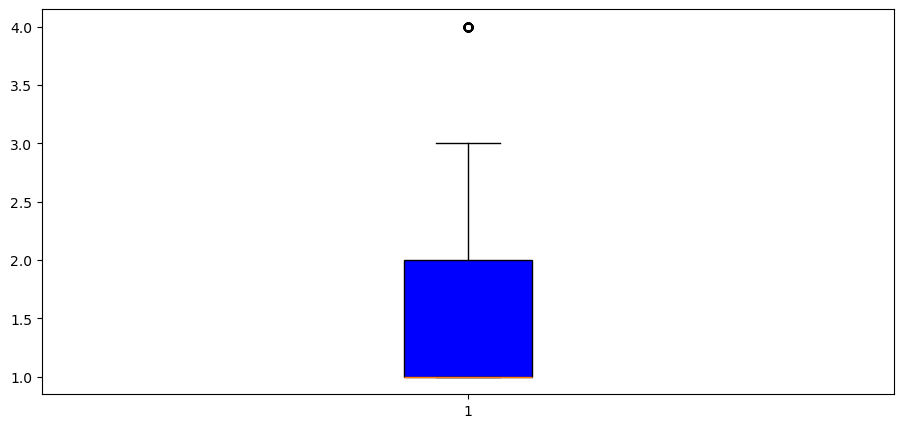

In [34]:
plt.figure(figsize=(11, 5))
plt.boxplot(data["NumOfProducts"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

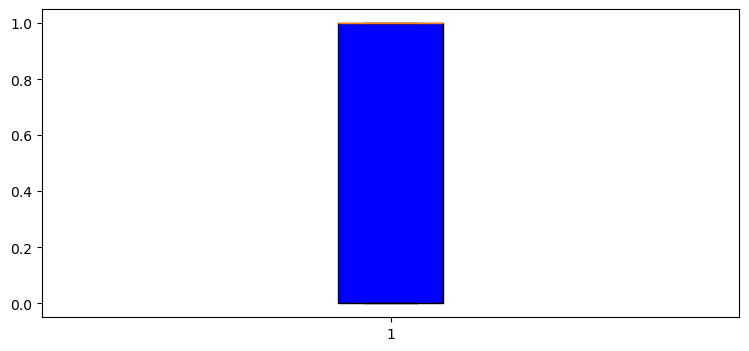

In [35]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["HasCrCard"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

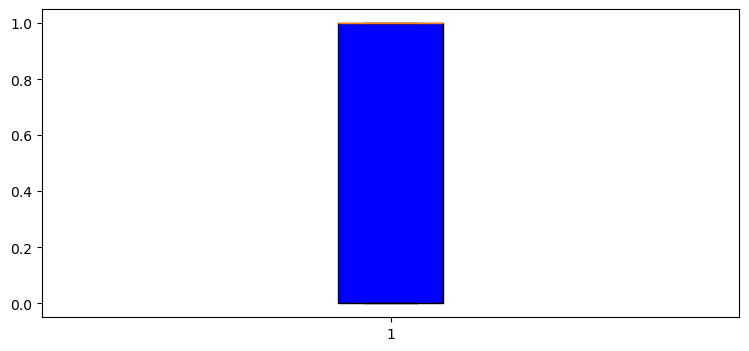

In [36]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["IsActiveMember"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

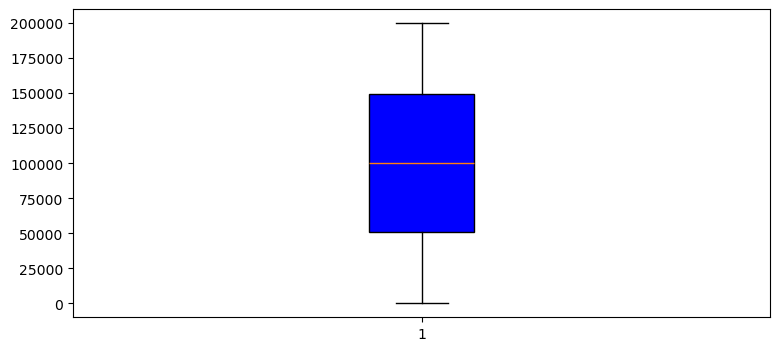

In [37]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["EstimatedSalary"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

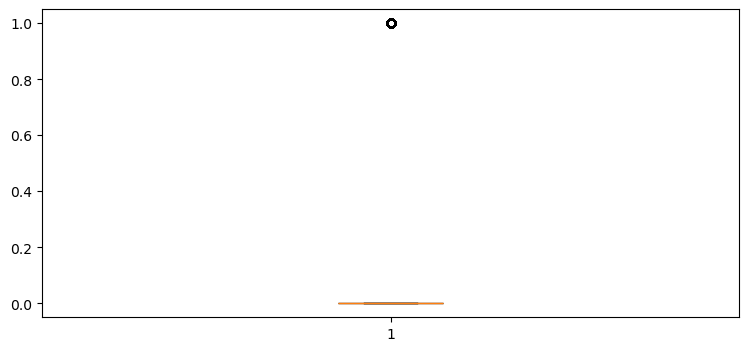

In [38]:
plt.figure(figsize=(9, 4))
plt.boxplot(data["Exited"], patch_artist=True,
          boxprops=dict(facecolor="blue"))
plt.show()

- **Outliers ( z_score au cas de Loi Normale**

In [39]:
from scipy import stats

def detect_outliers(data, column):
     z_scores = stats.zscore(data[column])
     threshold = 3
     outliers = data[np.abs(z_scores) > threshold][column]
     return outliers

numeric_cols = data.select_dtypes(exclude='object').columns

for column in numeric_cols:
     outliers = detect_outliers(data, column)
     print(f"Colonne {column}: {len(outliers)} outliers détectés")

Colonne RowNumber: 0 outliers détectés
Colonne CustomerId: 0 outliers détectés
Colonne CreditScore: 8 outliers détectés
Colonne Age: 133 outliers détectés
Colonne Tenure: 0 outliers détectés
Colonne Balance: 0 outliers détectés
Colonne NumOfProducts: 60 outliers détectés
Colonne HasCrCard: 0 outliers détectés
Colonne IsActiveMember: 0 outliers détectés
Colonne EstimatedSalary: 0 outliers détectés
Colonne Exited: 0 outliers détectés


In [40]:
def remove_outliers(data, column):
     z_scores = stats.zscore(data[column])
     threshold = 3
     data_cleaned = data[np.abs(z_scores) <= threshold]
     return data_cleaned

In [41]:
# # Apply the function to remove outliers for each numeric column
# for column in numeric_cols:
#      data = remove_outliers(data, "CreditScore")
# print(f"New shape of data after removing outliers: {data.shape}")

In [42]:
# Apply the function to remove outliers for each numeric column
for column in numeric_cols:
     data = remove_outliers(data, "NumOfProducts")
print(f"New shape of data after removing outliers: {data.shape}")

New shape of data after removing outliers: (9940, 14)


In [43]:
number_data=data.select_dtypes( include = [np.number])
#obejct_data

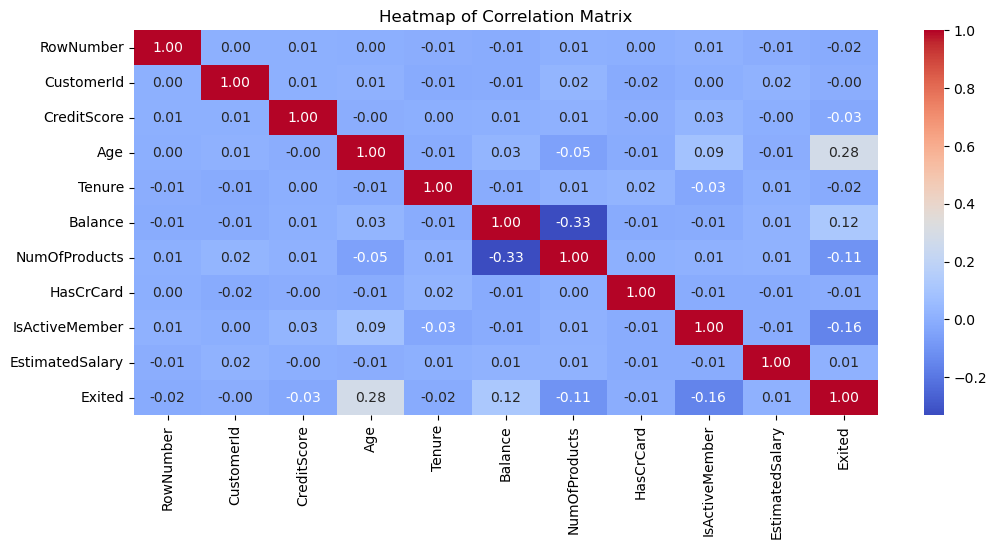

In [44]:
plt.figure(figsize=(12, 5))
correlation_matrix = number_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [45]:
# obejct_data =data.select_dtypes( include = ["O"])
#  obejct_data

# **Partie 3 : Data Transformation**

In [46]:
data = pd.get_dummies(data , columns = ["Geography",
                              "Gender"])

In [47]:
data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


# **Partie 4 : Modele de ML**

- *Selection des features*

In [48]:
X = data.drop(columns = ["Geography_Germany", "Surname" , "CustomerId",
               "RowNumber"])
Y = data["Exited"]

In [49]:
data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [50]:
Y.value_counts()

Exited
0    7963
1    1977
Name: count, dtype: int64

In [51]:
print(X.shape)
print(X.ndim)

(9940, 13)
2


In [52]:
print(Y.shape)
print(Y.ndim)

(9940,)
1


In [53]:
# # Correct import for under-sampling
# from imblearn.under_sampling import RandomUnderSampler

# Sampling = RandomUnderSampler(sampling_strategy="majority" ,
#                          random_state = 42)
# X_sim , Y_sim = Sampling.fit_resample(X,Y)

In [54]:
# from imblearn.combine import SMOTEENN

# smote = SMOTEENN(sampling_strategy="auto", random_state=42)
# X_res, y_res = smote.fit_resample(X, Y)

In [55]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

- **Diviser les donnees en train et test**

In [56]:
X_train , X_test , Y_train , Y_test = train_test_split( X_res , y_res , 
                    test_size = 0.2 , random_state = 42 )

In [57]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
# Normalisation des données

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train.shape

(12740, 13)

In [60]:
X_test.shape

(3186, 13)

- **Creation de modele**

In [61]:
model = LogisticRegression()

- **Entrainement de Modele**

In [62]:
model.fit(X_train , Y_train)

LogisticRegression()

- **Prediction de modele**

In [63]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

- **Evaluation de Modele**

In [64]:
# Accuracy du modèle
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

rappel = recall_score(Y_test, y_pred)
print(f"recall_score : {rappel:.2f}")

F1_score = f1_score(Y_test, y_pred)
print(f"f1_score : {F1_score:.2f}")

precision = precision_score(Y_test, y_pred)
print(f"precision_score : {precision:.2f}")

#report = classification_report(Y_test , y_pred )
#print(f"classification_report : {classification_report}")


Accuracy: 1.00
recall_score : 1.00
f1_score : 1.00
precision_score : 1.00


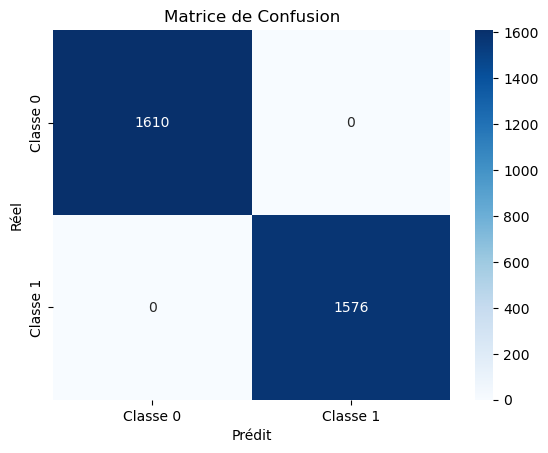

In [65]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [66]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 0.00%
Porcentaje de error de la clase 1: 0.00%


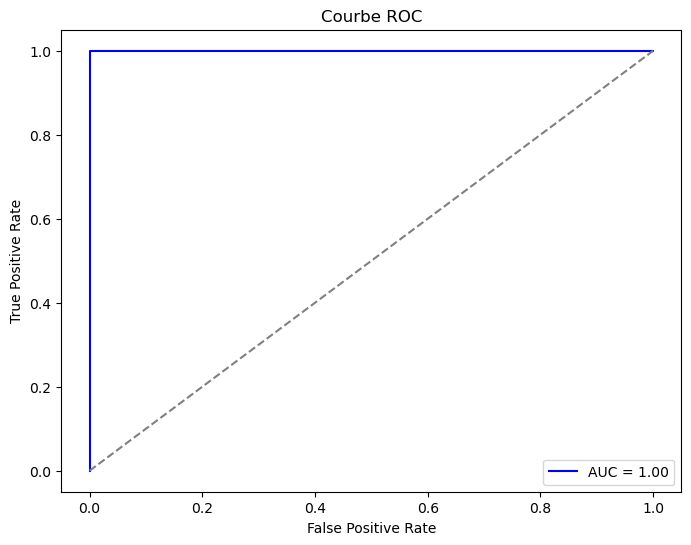

In [67]:
from sklearn.metrics import auc

# Calcul de la courbe ROC
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

### **Validation du modele**

In [68]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 5 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(model , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Scores de validation croisee : [0.82645875 0.83551308 0.84205231 0.84004024 0.84909457]
Score moyen : 0.84


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# Prédiction sur les données de test
y_pred_0 = model.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_0)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred_1 = model.predict(X_train)
acc = accuracy_score( Y_train , y_pred_1)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 1.00
Accuracy de train est : 1.00


# **Modele de KNN**

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# 4. Initialiser le modèle KNN avec K=5
knn = KNeighborsClassifier(n_neighbors = 5 )

# 5. Entraîner le modèle
knn.fit(X_train, Y_train)

# 6. Faire des prédictions
y_pred_K = knn.predict(X_test)

# 7. Évaluer le modèle
accuracy = accuracy_score(Y_test, y_pred_K)
print(f"Précision du modèle KNN : {accuracy:.2f}")

F1 = f1_score(Y_test , y_pred_K)
print(f"f1_score : {F1:.2f}")

recall = recall_score (Y_test , y_pred)
print(f"recall_score : {recall:.2f}")

Précision du modèle KNN : 1.00
f1_score : 1.00
recall_score : 1.00


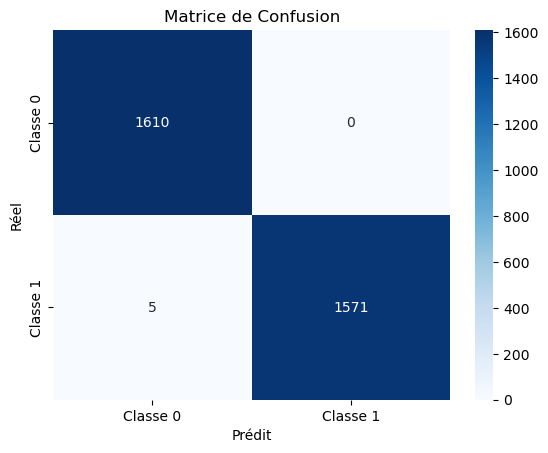

In [71]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_K)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [72]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 0.00%
Porcentaje de error de la clase 1: 0.32%


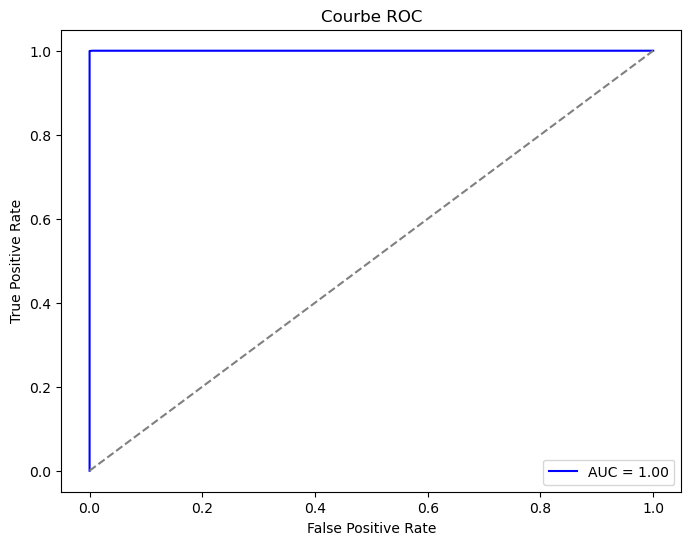

In [73]:
from sklearn.metrics import auc

# Calcul de la courbe ROC
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

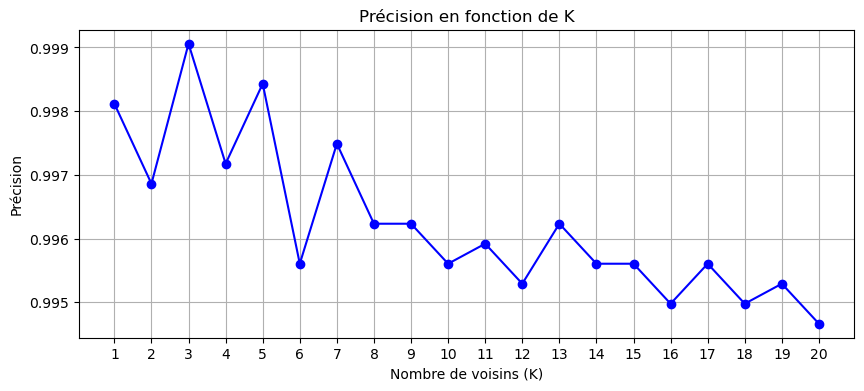

In [74]:
# Liste pour stocker les précisions
accuracies = []

# Tester différents K
k_values = range(1, 21)
for k in k_values:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train, Y_train)
     y_pred = knn.predict(X_test)
     accuracies.append(accuracy_score(Y_test, y_pred))

# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Précision en fonction de K")
plt.xlabel("Nombre de voisins (K)")
plt.ylabel("Précision")
plt.xticks(k_values)
plt.grid()
plt.show()

## **Validation de modele KNN**

In [75]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(knn , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [0.79225352 0.80633803 0.79225352 0.8056338  0.79507042 0.79366197
 0.81197183]
Score moyen : 0.80


In [76]:
# Prédiction sur les données de test
y_pred_KNN = knn.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_KNN)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred_KN = knn.predict(X_train)
acc = accuracy_score( Y_train , y_pred_KN)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 0.99
Accuracy de train est : 1.00


## **Modele de Decision Tree**

Précision du modèle : 1.00


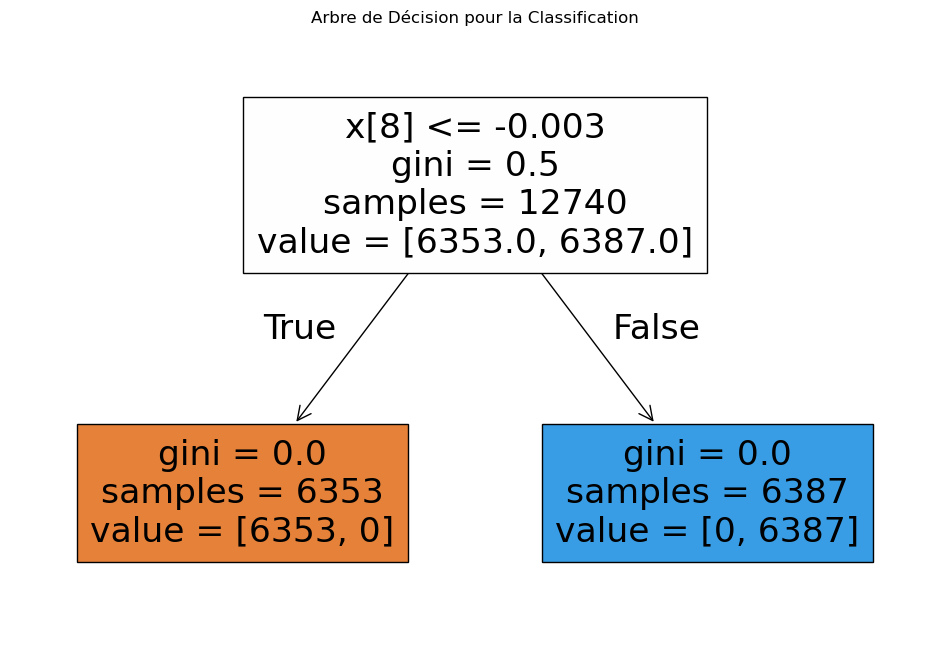

In [77]:
# Importation des bibliothèques
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Création et entraînement du modèle Decision Tree
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 7, random_state = 42)
dt.fit(X_train, Y_train)

# Prédiction sur les données test
y_pred_X = dt.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred_X)
print(f"Précision du modèle : {accuracy:.2f}")

# Visualisation de l’arbre de décision
plt.figure(figsize = (12, 8))
tree.plot_tree( dt , filled = True ,)
plt.title("Arbre de Décision pour la Classification")
plt.show()

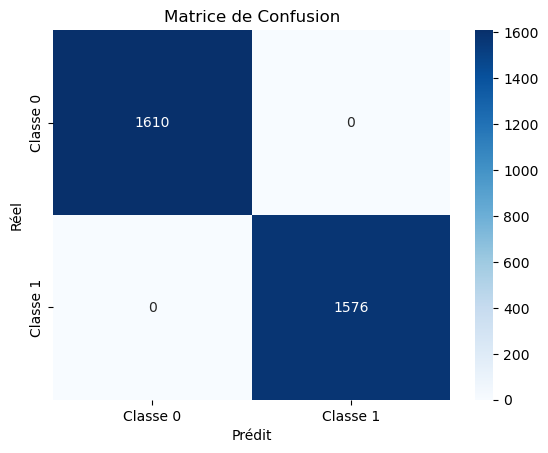

In [78]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_X)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [79]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 0.00%
Porcentaje de error de la clase 1: 0.00%


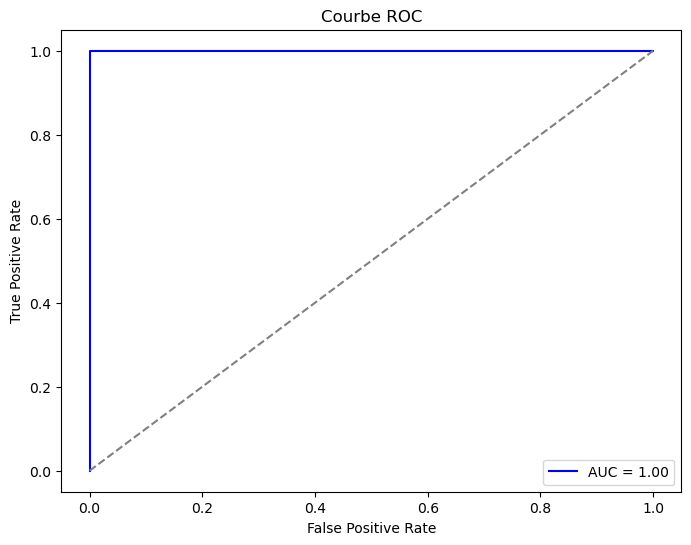

In [80]:
from sklearn.metrics import auc

# Calcul de la courbe ROC
y_scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## **Validation de Modele Desision Tree**

In [81]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(dt , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [1. 1. 1. 1. 1. 1. 1.]
Score moyen : 1.00


In [82]:
# Prédiction sur les données de test
y_pred_ = dt.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred__ = dt.predict(X_train)
acc = accuracy_score( Y_train , y_pred__)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 1.00
Accuracy de train est : 1.00


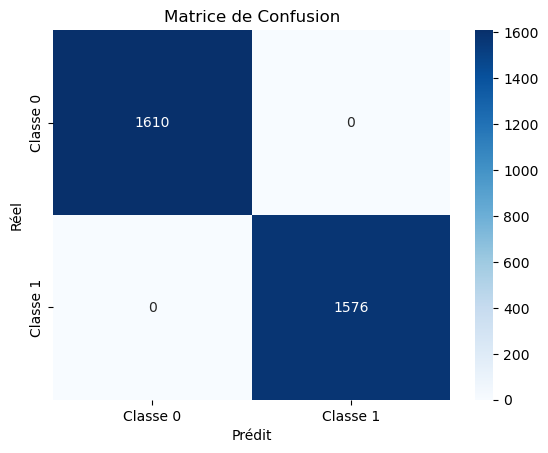

In [83]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [84]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 0.00%
Porcentaje de error de la clase 1: 0.00%


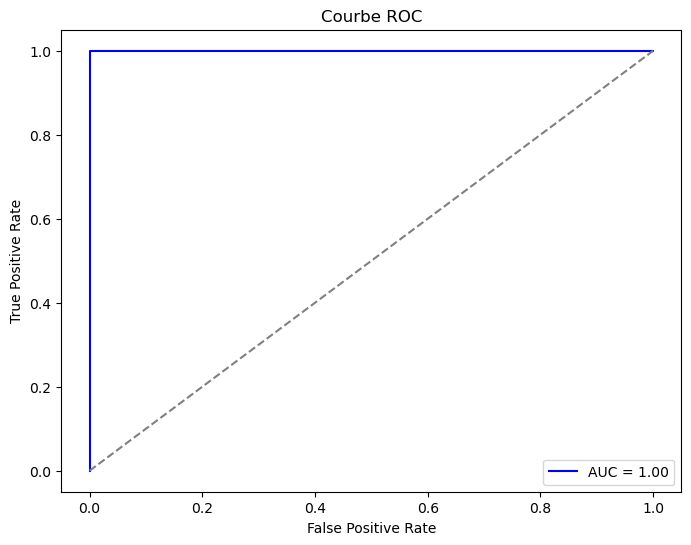

In [85]:
from sklearn.metrics import auc

# Calcul de la courbe ROC
y_scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# **Modele de RandomForest**

In [86]:
from sklearn.ensemble import RandomForestClassifier  

# Création et entraînement du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 80,
                         criterion = "gini", max_depth = 14,
random_state=42)
rf_classifier.fit(X_train, Y_train)

# Prédiction sur les données test
y_pred = rf_classifier.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
#print("\nRapport de classification :\n", classification_report(Y_test, y_pred))
#print("\nMatrice de confusion :\n", confusion_matrix(Y_test, y_pred))

Précision du modèle : 1.00


In [87]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(rf_classifier , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [1. 1. 1. 1. 1. 1. 1.]
Score moyen : 1.00


In [88]:
# Prédiction sur les données de test
y_pred_ = rf_classifier.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred__ = rf_classifier.predict(X_train)
acc = accuracy_score( Y_train , y_pred__)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 1.00
Accuracy de train est : 1.00


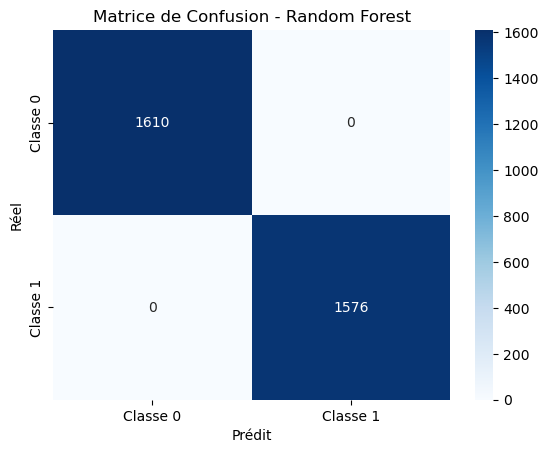

In [89]:
# Matrice de confusion pour le modèle Random Forest
conf_matrix_rf = confusion_matrix(Y_test, y_pred_)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Classe 0', 'Classe 1'],
               yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Random Forest')
plt.show()

In [90]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrar el porcentaje de error para cada clase
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 0.00%
Porcentaje de error de la clase 1: 0.00%


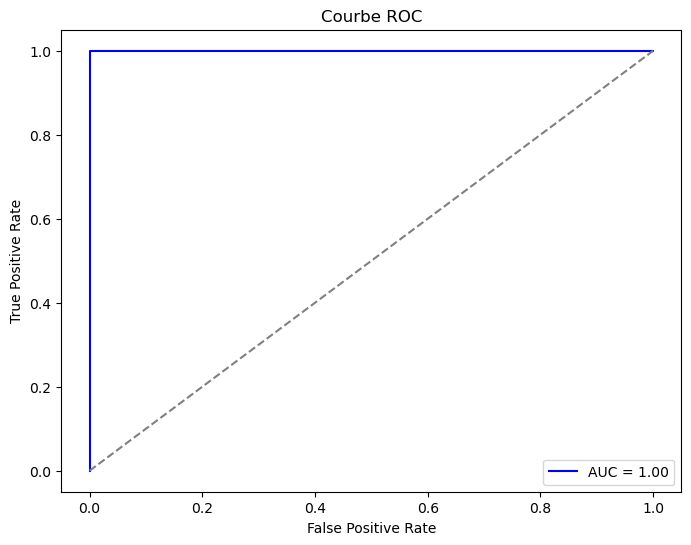

In [91]:
from sklearn.metrics import auc

# Calcul de la courbe ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# **Modele de SVM**

In [92]:
from sklearn.svm import SVC

# 3. Initialiser le modèle SVM
SVM_ = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# 4. Entraîner le modèle
SVM_.fit(X_train, Y_train)

# 5. Prédiction sur X_test (données réelles)
Y_pred = SVM_.predict(X_test)

# 6. Évaluation du modèle
#print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1610
           1       1.00      1.00      1.00      1576

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186



In [93]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(SVM_ , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [0.7915493  0.8084507  0.79507042 0.8084507  0.7971831  0.7943662
 0.81267606]
Score moyen : 0.80


In [94]:
# Prédiction sur les données de test
y_pred_SVM_ = SVM_.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_SVM_)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred_SVM = SVM_.predict(X_train)
acc = accuracy_score( Y_train , y_pred_SVM)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 1.00
Accuracy de train est : 1.00


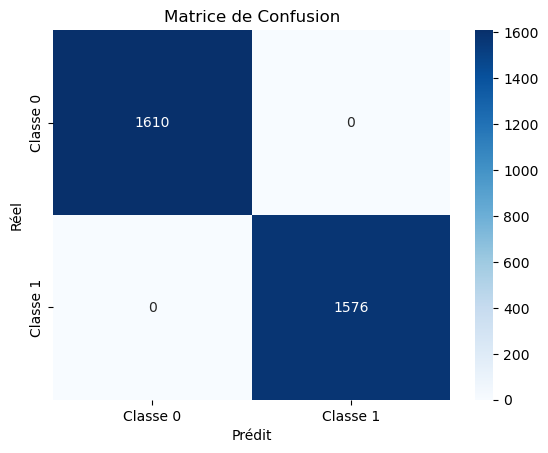

In [95]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_SVM_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [96]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrar el porcentaje de error para cada clase
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 0.00%
Porcentaje de error de la clase 1: 0.00%


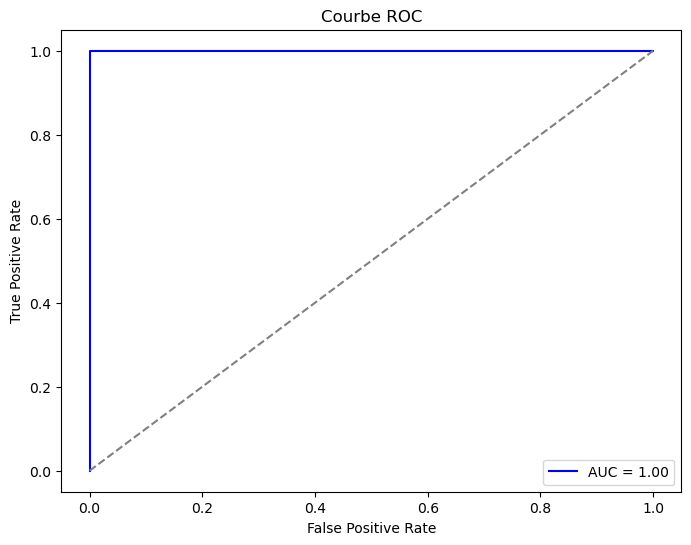

In [97]:
from sklearn.metrics import auc

# Calcul de la courbe ROC
# Ensure the SVM model is trained and supports probability predictions
if hasattr(SVM_, "predict_proba"):
	y_scores = SVM_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

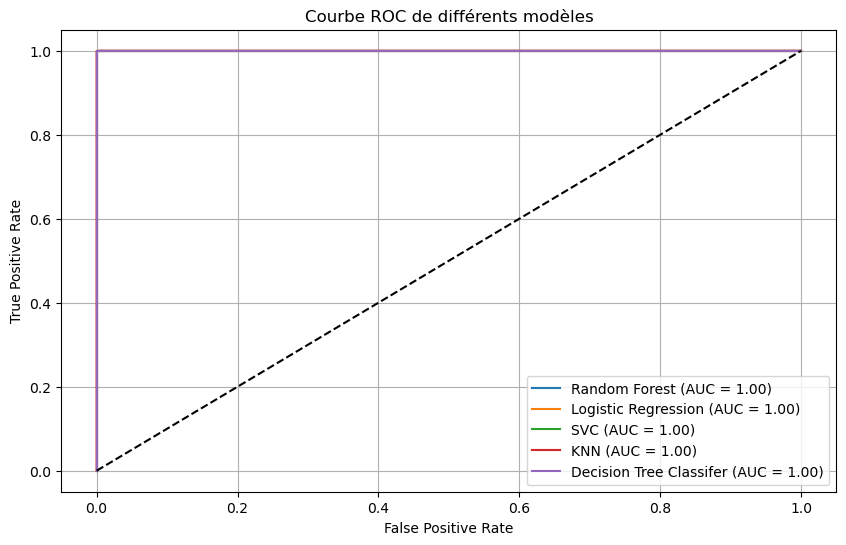

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVC": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree Classifer" : DecisionTreeClassifier()
    #"Gradient Boosting": GradientBoostingClassifier()
}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, Y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la ligne de référence
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de différents modèles')
plt.legend(loc ='lower right')
plt.grid(True)
plt.show()

In [99]:
clas_report_Logisic = classification_report(Y_test, y_pred)
print(clas_report_Logisic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1610
           1       1.00      1.00      1.00      1576

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186



## **Predection de nouvelle valeur *Modele de RandomForest***

In [100]:
# # Exemple de nouvelle donnée spécifique
# nouvelle_donnee = [[700, 40, 5,50000, 2, 1, 1, 60000, 1, 0, 0, 1, 0]]

# # Ajouter une colonne fictive pour correspondre au nombre de caractéristiques (14)
# # Par exemple, ajouter une valeur par défaut pour la colonne manquante
# nouvelle_donnee[0].insert(0, 0)  # Insérer une valeur fictive au début

# # Prédiction de la classe pour la nouvelle donnée
# classe_predite = rf_classifier.predict(scaler.transform(nouvelle_donnee))

# # Affichage de la classe prédite
# print(f"Classe prédite : {classe_predite[0]}")

In [101]:
import pickle
# Sauvegarder le modèle
with open("model.pkl", "wb") as file:
     pickle.dump(rf_classifier, file)

In [102]:
# Charger le modele 
with open("model.pkl", "rb") as file:
     my_model = pickle.load(file)

In [103]:
#my_model.predict([[700, 40, 5,50000, 2, 1, 0, 60000, 1, 0, 0, 1, 0 , 0]])

In [104]:
# Dictionnaire des modèles et leurs accuracies
model_accuracies = {
     "Logistic Regression": accuracy_score(Y_test, y_pred_0),
     "KNN": accuracy_score(Y_test, y_pred_KNN),
     "Decision Tree": accuracy_score(Y_test, y_pred_X),
     "Random Forest": accuracy_score(Y_test, y_pred_),
     "SVM": accuracy_score(Y_test, y_pred_SVM_)
}

# Affichage des accuracies
for model_name, acc in model_accuracies.items():
     print(f"Accuracy de {model_name} : {acc:.2f}")

Accuracy de Logistic Regression : 1.00
Accuracy de KNN : 0.99
Accuracy de Decision Tree : 1.00
Accuracy de Random Forest : 1.00
Accuracy de SVM : 1.00
